# Sprint22 深層学習スクラッチ リカレントニューラルネットワーク

#### インポート

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 【問題1】SimpleRNNのフォワードプロパゲーション実装

## 【問題2】小さな配列でのフォワードプロパゲーションの実験

#### データ

In [53]:
x = np.array([[[1, 2], [2, 3], [3, 4]]])/100 # (batch_size, n_sequences, n_features)
w_x = np.array([[1, 3, 5, 7], [3, 5, 7, 8]])/100 # (n_features, n_nodes)
w_h = np.array([[1, 3, 5, 7], [2, 4, 6, 8], [3, 5, 7, 8], [4, 6, 8, 10]])/100 # (n_nodes, n_nodes)
batch_size = x.shape[0] # 1
n_sequences = x.shape[1] # 3
n_features = x.shape[2] # 2
n_nodes = w_x.shape[1] # 4
h = np.zeros((batch_size, n_nodes)) # (batch_size, n_nodes)
b = np.array([1, 1, 1, 1]) # (n_nodes,)

#### 想定結果

h = np.array([[0.79494228, 0.81839002, 0.83939649, 0.85584174]]) # (batch_size, n_nodes)

#### 説明

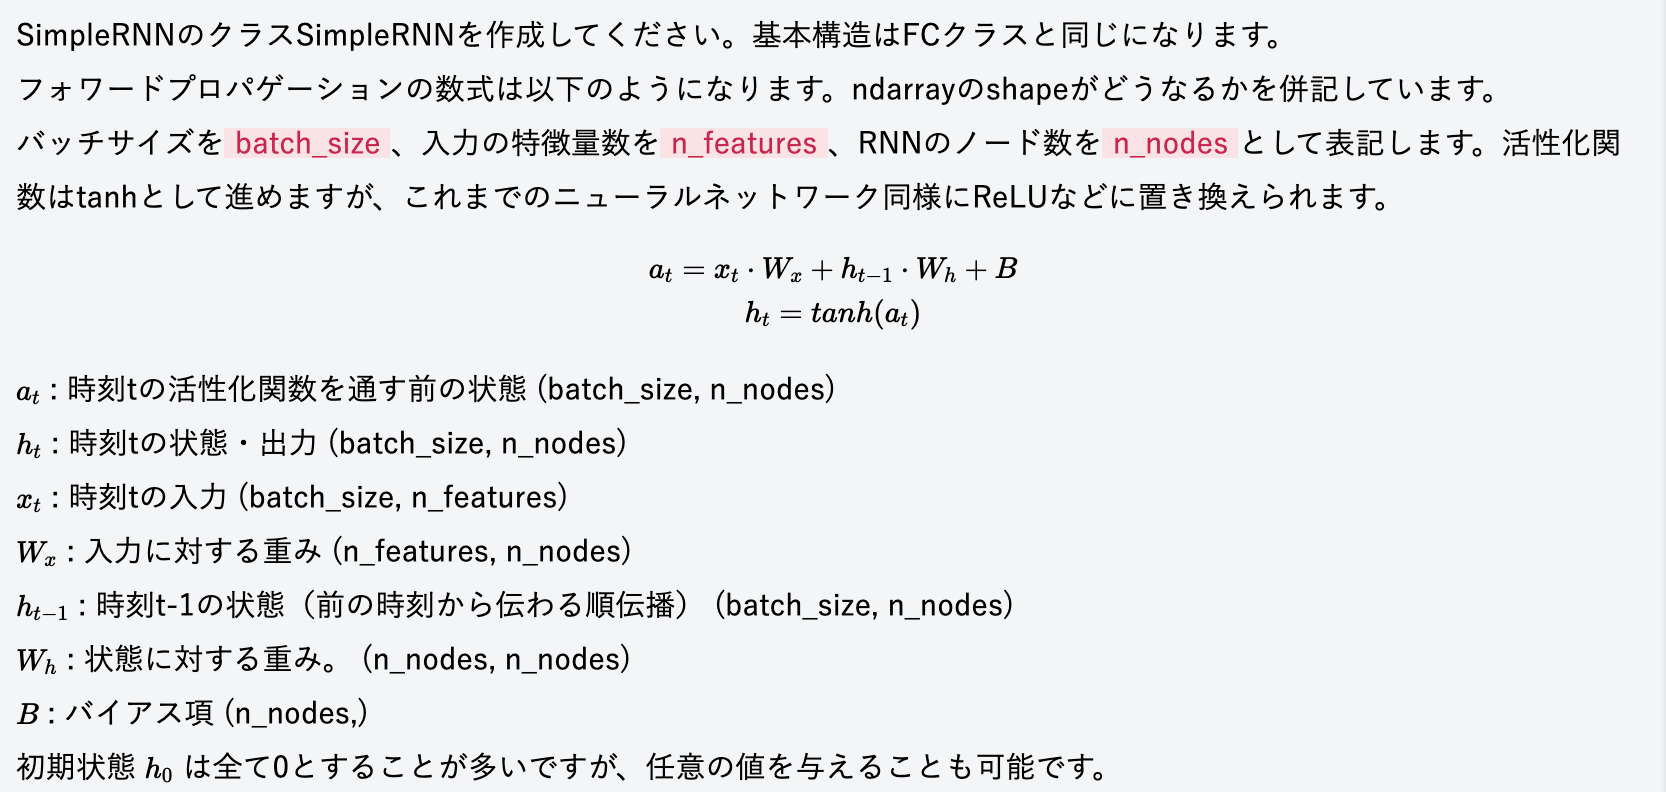

In [12]:
from IPython.display import display
from PIL import Image
Pred = "スクリーンショット 2019-12-27 11.25.14.png"
display(Image.open(Pred))

#### 計算の流れ

#### 0

In [17]:
print(x[:,0,:])

[[0.01 0.02]]


In [16]:
x.shape

(1, 3, 2)

In [21]:
xw0 = np.dot(x[:,0,:],w_x)

In [22]:
print(xw0)

[[0.0007 0.0013 0.0019 0.0023]]


In [23]:
xw0b = xw0+b

In [24]:
print(xw0b)

[[1.0007 1.0013 1.0019 1.0023]]


In [29]:
h_s0 = np.tanh(xw0b)

In [30]:
print(h_s0)

[[0.76188798 0.76213958 0.76239095 0.76255841]]


#### 1

In [31]:
xw1 = np.dot(x[:,1,:],w_x)

In [33]:
h_s0_w_h = np.dot(h_s0,w_h)

In [34]:
xwh1 =xw1+h_s0_w_h

In [35]:
xwh1b = xwh1+b

In [36]:
h_s1= np.tanh(xwh1b)

#### 2

In [37]:
xw2 = np.dot(x[:,2,:],w_x)

In [38]:
h_s1_w_h = np.dot(h_s1,w_h)

In [39]:
xwh2 =xw2+h_s1_w_h

In [40]:
xwh2b = xwh2+b

In [41]:
h_s2= np.tanh(xwh2b)

In [42]:
print(h_s2)

[[0.79494228 0.81839002 0.83939649 0.85584174]]


In [44]:
test_h_s = np.zeros((batch_size, n_nodes))

In [45]:
test_h_s =h_s2

In [47]:
print(test_h_s)

[[0.79494228 0.81839002 0.83939649 0.85584174]]


## クラス化

In [56]:
class ScratchSimpleRNNClassifier():
    
    def __init__(self,):
        
        pass
      
    def fit(self, X):
        #インスタンス化
        self.SimpleRNN = SimpleRNN(w_x,w_h,b,batch_size,n_sequences,n_features,n_nodes)
        #self.activation1 = Tanh()
               
        #フォワード
        h_s = self.SimpleRNN.forward(X)
        
        return h_s

In [55]:
class SimpleRNN():
    """
    ノード数n_nodes1からn_nodes2への全結合層
    Parameters
    ----------
    n_nodes1 : int
      前の層のノード数
    n_nodes2 : int
      後の層のノード数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """
    def __init__(self, w_x,w_h,b,batch_size,n_sequences,n_features,n_nodes):
        # 初期化
        # initializerのメソッドを使い、self.Wとself.Bを初期化する
        self.W_x=w_x
        self.W_h=w_h
        self.B =b
        
        self.batch_size = batch_size # 1
        self.n_sequences = n_sequences # 3
        self.n_features = n_features # 2
        self.n_nodes = n_nodes # 4
         
    def forward(self, X):
        """
        フォワード
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes2)
            出力
        """        

        h_s = np.zeros((self.batch_size, self.n_nodes)) # (batch_size, n_nodes)        
        
        for t in range(self.n_sequences):
            xw1 = np.dot(X[:,t,:],self.W_x)
            h_s0_w_h = np.dot(h_s,self.W_h)
            xwh1 =xw1+h_s0_w_h
            xwh1b = xwh1+self.B
            h_s1= np.tanh(xwh1b)
            h_s = h_s1
            
        return h_s

## 実行

In [57]:
RNN =ScratchSimpleRNNClassifier()

In [58]:
h_s_aa = RNN.fit(x)

In [59]:
print(h_s_aa)

[[0.79494228 0.81839002 0.83939649 0.85584174]]


#### ↑想定する推定結果と一致